In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join('/Users/cd8607/Documents/Lammps_MD/', 'git_folder', 'Classes'))
import EAM_Fitting
import Handle_PotFiles
import time

os.chdir('/Users/cd8607/Documents/Lammps_MD')

np.linspace(0, 1, 2)

array([0., 1.])

In [35]:
pot, potlines, pot_params = Handle_PotFiles.read_pot('git_folder/Potentials/test.eam.alloy')

n_knots = {}
n_knots['He_F'] = 2
n_knots['He_p'] = 3
n_knots['W-He'] = 3
n_knots['He-He'] = 0
n_knots['H-He'] = 0

eam_fit = EAM_Fitting.Fit_EAM_Potential(pot, n_knots, pot_params, potlines, None, 0, '')
sample = eam_fit.gen_rand()

coef_dict = eam_fit.fit_sample(sample)

x_plt = np.linspace(0, 6, 1000)

y_plt = EAM_Fitting.splineval(x_plt, coef_dict['He_p'], eam_fit.knot_pts['He_p'])

plt.plot(x_plt, y_plt)

print(eam_fit.dof)

t1 = time.perf_counter()
eam_fit.sample_to_file(sample)
t2 = time.perf_counter()
print(t2-t1)

KeyError: 'He_p'

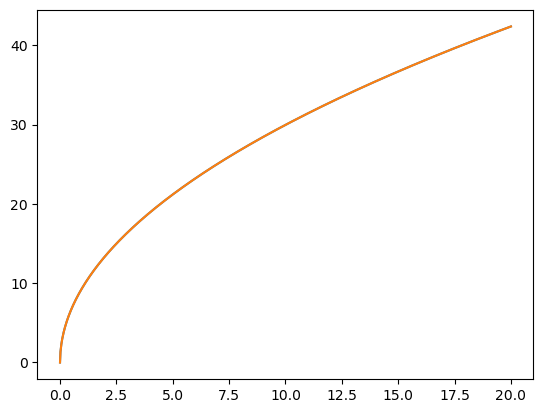

In [24]:
x_plt = np.linspace(0, 20, 1000)

y_plt = EAM_Fitting.splineval(x_plt, coef_dict['He_F'], eam_fit.knot_pts['He_F'])

plt.plot(x_plt, y_plt + sample[0]*np.sqrt(x_plt))
plt.plot(x_plt, sample[0]*np.sqrt(x_plt))

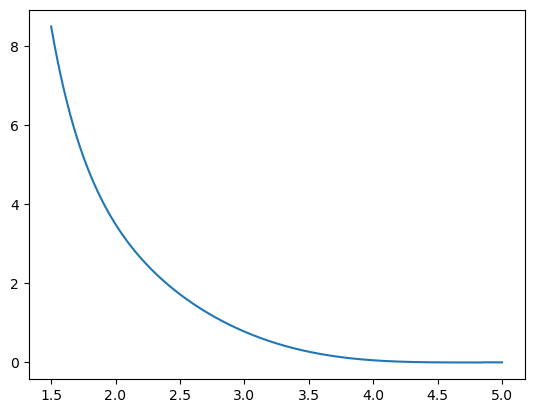

In [25]:
x_plt = np.linspace(1.5, 5, 1000)
zbl = EAM_Fitting.ZBL(74, 2)

y_plt = EAM_Fitting.splineval(x_plt, coef_dict['W-He'], eam_fit.knot_pts['W-He'])

plt.plot(x_plt, y_plt + zbl.eval_zbl(x_plt))

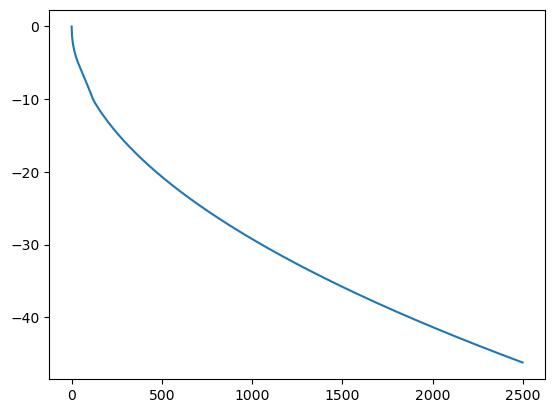

In [26]:
plt.plot(pot['W_F'])

In [27]:
data = np.loadtxt('dft_data.txt')

data_new = []

for row in data:
    v, h, he, image, ef, rvol = row

    if he == 0 and h > 0:
        continue
    
    data_new.append(row)

data_new = np.array(data_new)

np.savetxt('dft_data_new.txt', data_new ,fmt='%.3f')

In [28]:
from scipy import interpolate

with open('log.lammps', 'r') as file:
    log = file.readlines()

n_proc = int(log[1].split(' ')[2])

val = log[-1].split()[-2*n_proc:]

data = np.array([float(x) for x in val]).reshape(n_proc, 2)

x = data[:, 0]

y = data[:, 1]

y -= y.min()

cs = interpolate.Akima1DInterpolator(x, y)

x_plt = np.linspace(0,1,100)

y_plt = cs(x_plt)

plt.scatter(x, y, marker='o')
plt.plot(x_plt, y_plt,  linestyle=':')
plt.xlabel('Reaction Coordinate')
plt.ylabel('Energy / eV')
plt.title('Migration of Helium combining from 2 tetrahedral positions')

IndexError: list index out of range